In [1]:
# Correction of data of Monitoring Units from Hospital of Leiria (from Hospital Sudoe 4.0 project)

# Version 07  (last updated: 14/09/2022)
# Author: Nuno Canha
# Goal of the script: using the input dataset of the monitored data by MB507, it provides excel files with corrected data based in correction factors.

# Time window analysed: August2021-July2022

# MONITORING BOX TO BE ANALISED: MB507

In [2]:
# To run this notebook, you will only need to:
# 1) Define the working folder
# 2) Enter the name of the Monitoring Unit that you are analysing

In [3]:
# To check the working folder and use "cd" to enter on the working folder

In [4]:
pwd

'C:\\Users\\nunocanha\\Desktop\\Hospital Sudoe 4.0\\Correction of Sensors data\\MB507'

In [5]:
#To enter in the correct folder:

In [6]:
cd C:\\Users\\nunocanha\\Desktop\\Hospital Sudoe 4.0\\Correction of Sensors data\\MB507

C:\Users\nunocanha\Desktop\Hospital Sudoe 4.0\Correction of Sensors data\MB507


In [7]:
# Loading the data
name = input('Which Monitoring Unit is being analised?')

Which Monitoring Unit is being analised? MB507


In [8]:
# Upload the analysis packages

In [9]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [12]:
# Upload the data to create a single dataset based on the single files provided by the monitoring box:

dataCO2 = pd.read_csv("co2.csv", delimiter=";", na_values=['NA'])
dataRH = pd.read_csv("humidity.csv", delimiter=";", na_values=['NA'])
dataT = pd.read_csv("temperature.csv", delimiter=";", na_values=['NA'])
dataVOCs = pd.read_csv("vocs.csv", delimiter=";", na_values=['NA'])
dataPM10 = pd.read_csv("pcpm10.csv", delimiter=";", na_values=['NA'])
dataPM25 = pd.read_csv("pcpm25.csv", delimiter=";", na_values=['NA'])
# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

# To work on the timestamp:
dataCO2['Date']=pd.to_datetime(dataCO2['unix_timestamp'], unit='s')

# To put together all the data:
dataALL=pd.concat([dataCO2, dataRH, dataT, dataVOCs, dataPM10, dataPM25], axis=1)

# To select only the target parameters and the timestamp:
data=dataALL[["Date","co2_number","humidity_number","temperature_number","vocs_number", "pcpm25_number","pcpm10_number"]]
data = data.set_index('Date')

# To rename the columns' names to simplify the code writting 
new_names={'co2_number':'CO2','humidity_number':'RH','temperature_number': 'T', 'vocs_number': 'VOCs', 'pcpm25_number':'PM25', 'pcpm10_number':'PM10' }
data = data.rename(columns=new_names)
data

,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,
2020-09-02 18:32:42,525.0,37.57,29.85,305.0,6.0,7.0
2020-09-02 18:33:09,520.0,37.35,29.92,323.0,6.0,7.0
2020-09-02 18:47:42,490.0,35.82,30.50,475.0,6.0,7.0
2020-09-02 19:02:43,564.0,34.83,30.77,558.0,6.0,7.0
2020-09-02 19:07:22,488.0,34.39,30.87,567.0,6.0,7.0
...,...,...,...,...,...,...
2022-09-09 10:41:30,513.0,57.07,24.76,576.0,0.0,1.0
2022-09-09 10:46:29,504.0,56.84,24.70,650.0,0.0,1.0
2022-09-09 10:51:24,474.0,57.69,24.64,768.0,0.0,1.0


In [13]:
# Adicionar as etiquetas temporais:
# Add columns with year, month, and weekday name
data1=data
data1['Year'] = data1.index.year
data1['Month'] = data1.index.month
data1['Day'] = data1.index.day
data1['Hour'] = data1.index.hour
data1['Minute'] = data1.index.minute

data1

,CO2,RH,T,VOCs,PM25,PM10,Year,Month,Day,Hour,Minute
Date,,,,,,,,,,,
2020-09-02 18:32:42,525.0,37.57,29.85,305.0,6.0,7.0,2020,9,2,18,32
2020-09-02 18:33:09,520.0,37.35,29.92,323.0,6.0,7.0,2020,9,2,18,33
2020-09-02 18:47:42,490.0,35.82,30.50,475.0,6.0,7.0,2020,9,2,18,47
2020-09-02 19:02:43,564.0,34.83,30.77,558.0,6.0,7.0,2020,9,2,19,2
2020-09-02 19:07:22,488.0,34.39,30.87,567.0,6.0,7.0,2020,9,2,19,7
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09 10:41:30,513.0,57.07,24.76,576.0,0.0,1.0,2022,9,9,10,41
2022-09-09 10:46:29,504.0,56.84,24.70,650.0,0.0,1.0,2022,9,9,10,46
2022-09-09 10:51:24,474.0,57.69,24.64,768.0,0.0,1.0,2022,9,9,10,51


In [14]:
# Selecionar um período temporal e criar uma nova base de dados apenas com esse período

data2=data1[(data1.index > '2021-08-01 00:00:00')]
dataHL=data2[(data2.index < '2022-07-31 23:59:59')]
dataHL

# Export to csv
output_dataHL  = 'data_' + name + '_rawdata.csv'
dataHL.to_csv(output_dataHL, sep=',')

In [15]:
# Aplicar os factores de correção calculados

dataHL['CO2_c']=(dataHL['CO2']*1)+0
dataHL['RH_c']=(dataHL['RH']*1.1084)-2.95
dataHL['T_c']=(dataHL['T']*0.7907)+1.7818
dataHL['VOCs_c']=(dataHL['VOCs']*1)-0
dataHL['PM25_c']=(dataHL['PM25']*3.0289)+6.6741
dataHL['PM10_c']=(dataHL['PM10']*3.0857)+3.9559
dataHL

C:\Users\nunocanha\AppData\Local\Temp\ipykernel_34536\2651122664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataHL['CO2_c']=(dataHL['CO2']*1)+0
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_34536\2651122664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataHL['RH_c']=(dataHL['RH']*1.1084)-2.95
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_34536\2651122664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,CO2,RH,T,VOCs,PM25,PM10,Year,Month,Day,Hour,Minute,CO2_c,RH_c,T_c,VOCs_c,PM25_c,PM10_c
Date,,,,,,,,,,,,,,,,,
2021-08-01 00:02:48,426.0,54.34,23.06,572.0,0.0,1.0,2021,8,1,0,2,426.0,57.280456,20.015342,572.0,6.6741,7.0416
2021-08-01 00:07:53,426.0,54.31,23.05,572.0,0.0,1.0,2021,8,1,0,7,426.0,57.247204,20.007435,572.0,6.6741,7.0416
2021-08-01 00:12:48,426.0,54.25,23.02,567.0,0.0,1.0,2021,8,1,0,12,426.0,57.180700,19.983714,567.0,6.6741,7.0416
2021-08-01 00:17:48,428.0,54.21,23.08,567.0,0.0,1.0,2021,8,1,0,17,428.0,57.136364,20.031156,567.0,6.6741,7.0416
2021-08-01 00:22:49,430.0,54.24,23.03,567.0,0.0,1.0,2021,8,1,0,22,430.0,57.169616,19.991621,567.0,6.6741,7.0416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:35:36,435.0,50.32,22.98,449.0,0.0,1.0,2022,7,31,23,35,435.0,52.824688,19.952086,449.0,6.6741,7.0416
2022-07-31 23:40:35,434.0,50.62,22.97,454.0,0.0,1.0,2022,7,31,23,40,434.0,53.157208,19.944179,454.0,6.6741,7.0416
2022-07-31 23:45:34,441.0,50.92,22.99,458.0,0.0,1.0,2022,7,31,23,45,441.0,53.489728,19.959993,458.0,6.6741,7.0416


In [16]:
datac=dataHL.drop(['CO2','RH','T','VOCs','PM25','PM10'], axis=1)

# To rename the columns' names to simplify the code writting 
new_names2={'CO2_c':'CO2','RH_c':'RH','T_c': 'T', 'VOCs_c': 'VOCs', 'PM25_c':'PM25', 'PM10_c':'PM10' }
datac1 = datac.rename(columns=new_names2)

import numpy as np 
# Limpeza de dados: valores abaixo de 0 (para todos os parâmetros), excepto para CO2 (apenas valores acima de 380 ppm são mantidos):

datac2=datac1
datac2['VOCs']=datac2['VOCs'].mask(datac2['VOCs']<= 0)
datac2['T']=datac2['T'].mask(datac2['T']<= 6)
datac2['RH']=datac2['RH'].mask(datac2['RH']<= 0)
datac2['CO2']=datac2['CO2'].mask(datac2['CO2']<380)
datac2['PM25']=datac2['PM25'].mask(datac2['PM25']<=0)
datac2['PM25']=datac2['PM25'].mask(datac2['PM25']>500)
datac2['PM10']=datac2['PM10'].mask(datac2['PM10']<=0)
datac2['PM10']=datac2['PM10'].mask(datac2['PM10']>500)

datacf=datac2
datacf

,Year,Month,Day,Hour,Minute,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,,,,,,
2021-08-01 00:02:48,2021,8,1,0,2,426.0,57.280456,20.015342,572.0,6.6741,7.0416
2021-08-01 00:07:53,2021,8,1,0,7,426.0,57.247204,20.007435,572.0,6.6741,7.0416
2021-08-01 00:12:48,2021,8,1,0,12,426.0,57.180700,19.983714,567.0,6.6741,7.0416
2021-08-01 00:17:48,2021,8,1,0,17,428.0,57.136364,20.031156,567.0,6.6741,7.0416
2021-08-01 00:22:49,2021,8,1,0,22,430.0,57.169616,19.991621,567.0,6.6741,7.0416
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:35:36,2022,7,31,23,35,435.0,52.824688,19.952086,449.0,6.6741,7.0416
2022-07-31 23:40:35,2022,7,31,23,40,434.0,53.157208,19.944179,454.0,6.6741,7.0416
2022-07-31 23:45:34,2022,7,31,23,45,441.0,53.489728,19.959993,458.0,6.6741,7.0416


In [55]:
# Import seaborn for visualisation tools

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14, 6)})

In [18]:
# Resampling CO2 data

# Resample getting a several statistics parameters - Daily data
dailyCO2 = datacf['CO2'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyCO2['Year'] = dailyCO2.index.year
dailyCO2['Month'] = dailyCO2.index.month
dailyCO2['Day'] = dailyCO2.index.day


# Export to csv
output_dailyCO2  = 'data_' + name + '_dailyCO2.csv'
dailyCO2.to_csv(output_dailyCO2 , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyCO2 = datacf['CO2'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyCO2['Year'] = hourlyCO2.index.year
hourlyCO2['Month'] = hourlyCO2.index.month
hourlyCO2['Day'] = hourlyCO2.index.day
hourlyCO2['Hour'] = hourlyCO2.index.hour
hourlyCO2

# Export to csv
output_hourlyCO2  = 'data_' + name + '_hourlyCO2.csv'
hourlyCO2.to_csv(output_hourlyCO2 , sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyCO2 = datacf['CO2'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyCO2['Year'] = monthlyCO2.index.year
monthlyCO2['Month'] = monthlyCO2.index.month
monthlyCO2['Day'] = monthlyCO2.index.day
monthlyCO2

# Export to csv
output_monthlyCO2  = 'data_' + name + '_monthlyCO2.csv'
monthlyCO2.to_csv(output_monthlyCO2 , sep=',')

# Transpose the dataset:
series1 = pd.pivot_table(dailyCO2, index = 'Month', columns = 'Day', values = 'mean') 

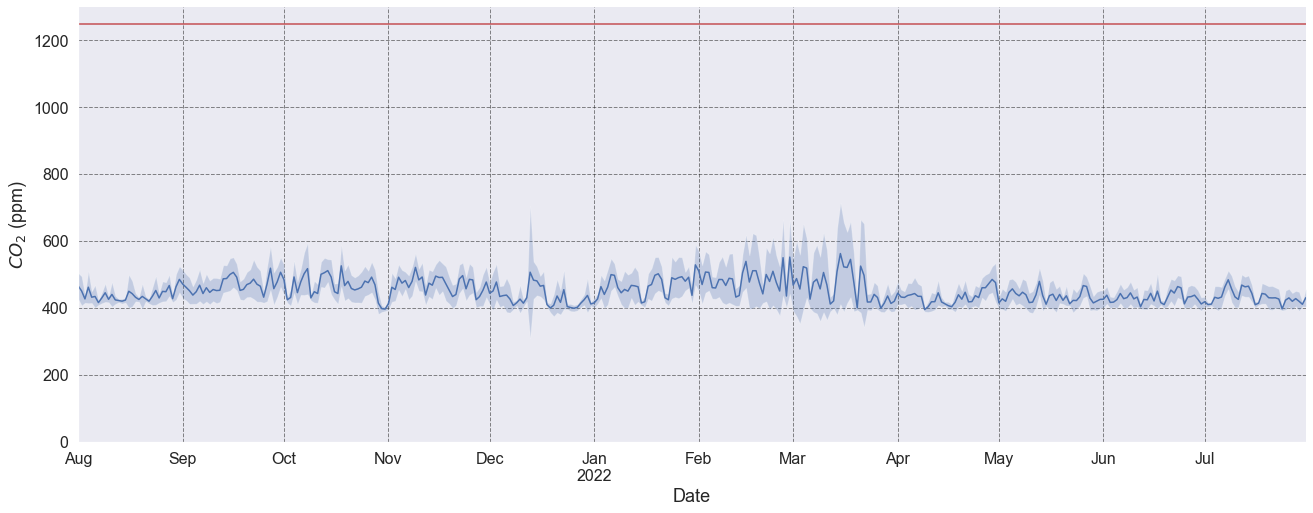

In [19]:
# Daily plot (Mean + SD) - All data

ax = dailyCO2['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyCO2.index, dailyCO2['mean'] - dailyCO2['std'], dailyCO2['mean'] + dailyCO2['std'], alpha=.25)
ax.axhline(y=1250, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,1300)

plt.ylabel("$CO_{2}$ (ppm)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig1a - Daily mean CO2 - all data @ '+ name) 



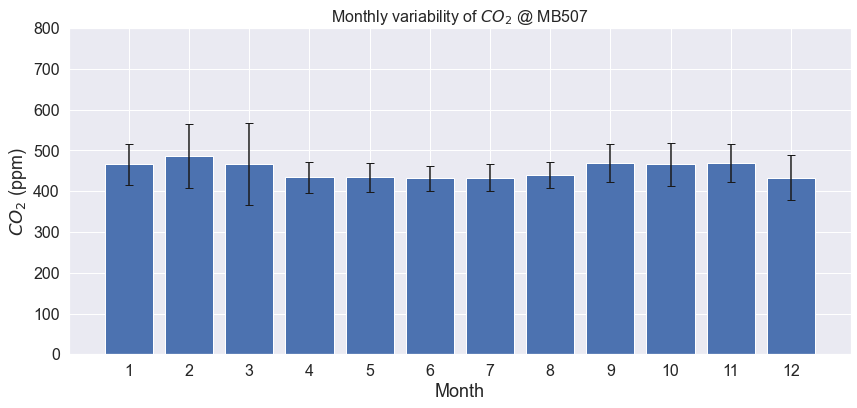

In [20]:
# Plot of box plots of daily CO2 data:

Fig1b, ax = plt.subplots()

ax.bar(x=monthlyCO2['Month'], #x-coordinates of bars
       height=monthlyCO2['mean'], #height of bars
       yerr=monthlyCO2['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('$CO_{2}$ (ppm)',fontsize=18)
ax.set_title('Monthly variability of $CO_{2}$ @ '+ name, fontsize=16)
ax.set_ylim(0,800)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.xticks(monthlyCO2['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig1b - Monthly variability of CO2 @ '+ name)



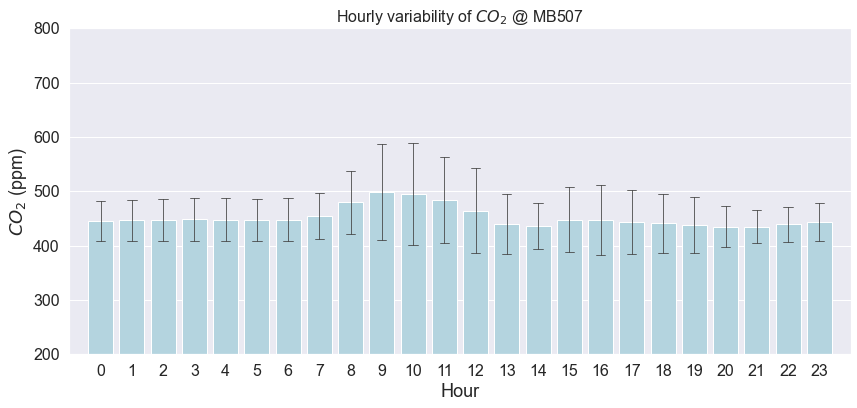

In [21]:
# Plot of box plots of Hourly data:
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

Fig1c = sns.barplot(x="Hour", y="CO2", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig1c.set_ylabel('$CO_{2}$ (ppm)',fontsize=18)
Fig1c.set_title('Hourly variability of $CO_{2}$ @ '+ name, fontsize=16)

Fig1c.tick_params(axis='x', labelsize=16)
Fig1c.tick_params(axis='y', labelsize=16)
Fig1c.set_ylim(200,800)
Fig1c.set_xlim(-1,24)

Fig1c.xaxis.set_major_formatter(ticker.EngFormatter())

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig1c - Hourly variability of CO2 @ '+ name)

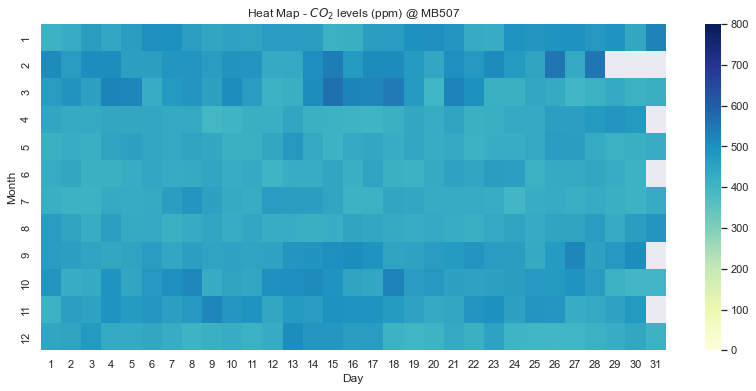

In [22]:
# Heatmap of daily data over months - CO2:

Fig1d = sns.heatmap(series1, vmin=0, vmax=800, cmap="YlGnBu")
Fig1d.set_title('Heat Map - $CO_{2}$ levels (ppm) @ '+ name)
plt.savefig('Fig1d - Heat Map - CO2 levels @ '+ name)

In [23]:
# Evaluation of Temperature variability

# Resample getting a several statistics parameters - Daily data
dailyT = datacf['T'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyT['Year'] = dailyT.index.year
dailyT['Month'] = dailyT.index.month
dailyT['Day'] = dailyT.index.day


# Export to csv
output_dailyT  = 'data_' + name + '_dailyT.csv'
dailyT.to_csv(output_dailyT , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyT = datacf['T'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyT['Year'] = hourlyT.index.year
hourlyT['Month'] = hourlyT.index.month
hourlyT['Day'] = hourlyT.index.day
hourlyT

# Export to csv
output_hourlyT  = 'data_' + name + '_hourlyT.csv'
hourlyT.to_csv(output_hourlyT , sep=',')

hourlyT

# Resample getting a several statistics parameters - Monthly data
monthlyT = datacf['T'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyT['Year'] = monthlyT.index.year
monthlyT['Month'] = monthlyT.index.month
monthlyT['Day'] = monthlyT.index.day
monthlyT

# Export to csv
output_monthlyT  = 'data_' + name + '_monthlyT.csv'
monthlyT.to_csv(output_monthlyT , sep=',')


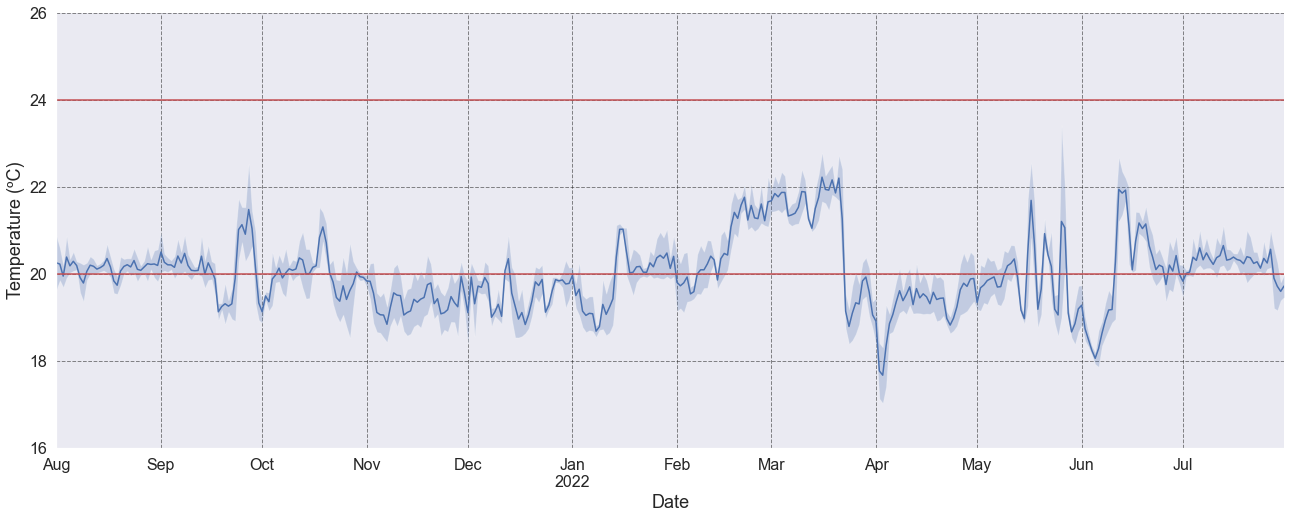

In [24]:
# Daily plot (Mean + SD) - All data - T

ax = dailyT['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyT.index, dailyT['mean'] - dailyT['std'], dailyT['mean'] + dailyT['std'], alpha=.25)
ax.axhline(y=20, color='r', linestyle='-')
ax.axhline(y=24, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(16,26)

plt.ylabel("Temperature (ºC)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig2a - Daily mean T - all data @ '+ name) 

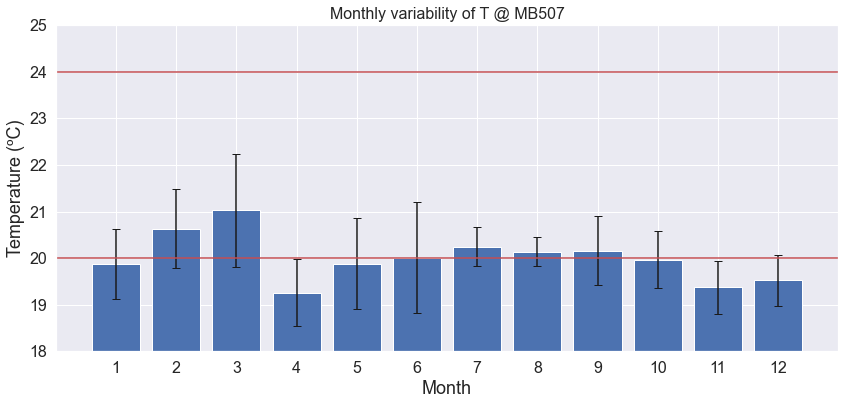

In [25]:
# Plot of box plots of daily T data:

Fig2b, ax = plt.subplots()

ax.bar(x=monthlyT['Month'], #x-coordinates of bars
       height=monthlyT['mean'], #height of bars
       yerr=monthlyT['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('Temperature (ºC)',fontsize=18)
ax.set_title('Monthly variability of T @ '+ name, fontsize=16)
ax.set_ylim(18,25)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=20, color='r', linestyle='-')
ax.axhline(y=24, color='r', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig2b - Monthly variability of T @ '+ name)

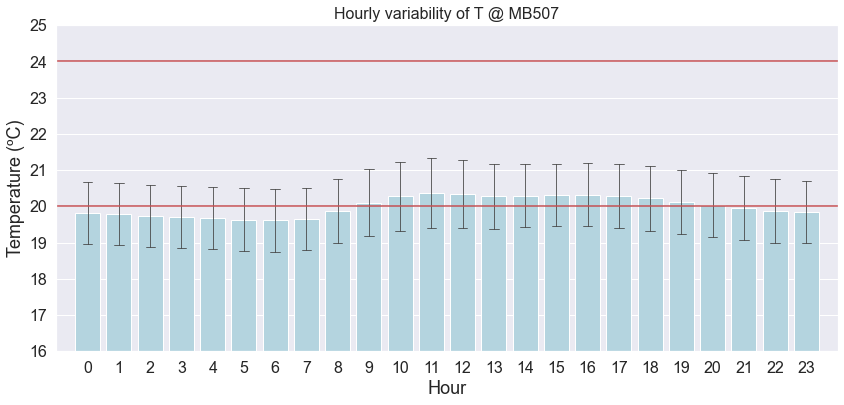

In [26]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig2c = sns.barplot(x="Hour", y="T", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig2c.set_ylabel('Temperature (ºC)',fontsize=18)
Fig2c.set_title('Hourly variability of T @ '+ name, fontsize=16)

Fig2c.tick_params(axis='x', labelsize=16)
Fig2c.tick_params(axis='y', labelsize=16)
Fig2c.set_ylim(16,25)
Fig2c.set_xlim(-1,24)

Fig2c.xaxis.set_major_formatter(ticker.EngFormatter())

Fig2c.axhline(y=20, color='r', linestyle='-')
Fig2c.axhline(y=24, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig2c - Hourly variability of T @ '+ name)

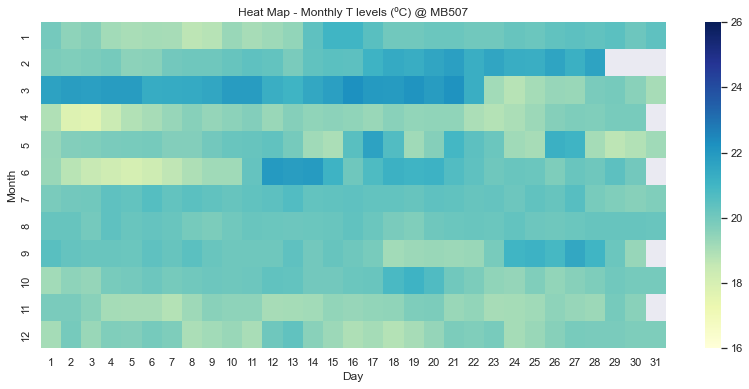

In [27]:
#Heat Map

# Transpose the dataset:

series2 = pd.pivot_table(dailyT, index = 'Month', columns = 'Day', values = 'mean') 
Fig2d = sns.heatmap(series2, vmin=16, vmax=26, cmap="YlGnBu")
Fig2d.set_title('Heat Map - Monthly T levels (ºC) @ '+ name)
plt.savefig('Fig2d - Heat Map - T levels @ '+ name)

In [28]:
# Evaluation of VOCs variability

# Resample getting a several statistics parameters - Daily data
dailyVOCs = datacf['VOCs'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyVOCs['Year'] = dailyVOCs.index.year
dailyVOCs['Month'] = dailyVOCs.index.month
dailyVOCs['Day'] = dailyVOCs.index.day


# Export to csv
output_dailyVOCs  = 'data_' + name + '_dailyVOCs.csv'
dailyVOCs.to_csv(output_dailyVOCs , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyVOCs = datacf['VOCs'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyVOCs['Year'] = hourlyVOCs.index.year
hourlyVOCs['Month'] = hourlyVOCs.index.month
hourlyVOCs['Day'] = hourlyVOCs.index.day
hourlyVOCs

# Export to csv
output_hourlyVOCs  = 'data_' + name + '_hourlyVOCs.csv'
hourlyVOCs.to_csv(output_hourlyVOCs , sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyVOCs = datacf['VOCs'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyVOCs['Year'] = monthlyVOCs.index.year
monthlyVOCs['Month'] = monthlyVOCs.index.month
monthlyVOCs['Day'] = monthlyVOCs.index.day

# Export to csv
output_monthlyVOCs  = 'data_' + name + '_monthlyVOCs.csv'
monthlyVOCs.to_csv(output_monthlyVOCs, sep=',')

monthlyVOCs

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,548.186622,95.812795,8970,528.0,379.0,995.0,2021,8,31
2021-09-30,573.585996,127.231149,8669,541.0,353.0,995.0,2021,9,30
2021-10-31,539.577069,113.233842,8966,524.0,296.0,995.0,2021,10,31
2021-11-30,561.819753,121.047668,8677,545.0,305.0,995.0,2021,11,30
2021-12-31,496.463955,106.202610,8975,475.0,331.0,995.0,2021,12,31
2022-01-31,545.122793,149.085380,8950,517.0,248.0,995.0,2022,1,31
2022-02-28,562.521032,171.522732,8059,510.0,279.0,995.0,2022,2,28
2022-03-31,493.104029,193.472487,8959,441.0,222.0,995.0,2022,3,31
2022-04-30,436.019388,136.400901,8665,419.0,117.0,995.0,2022,4,30


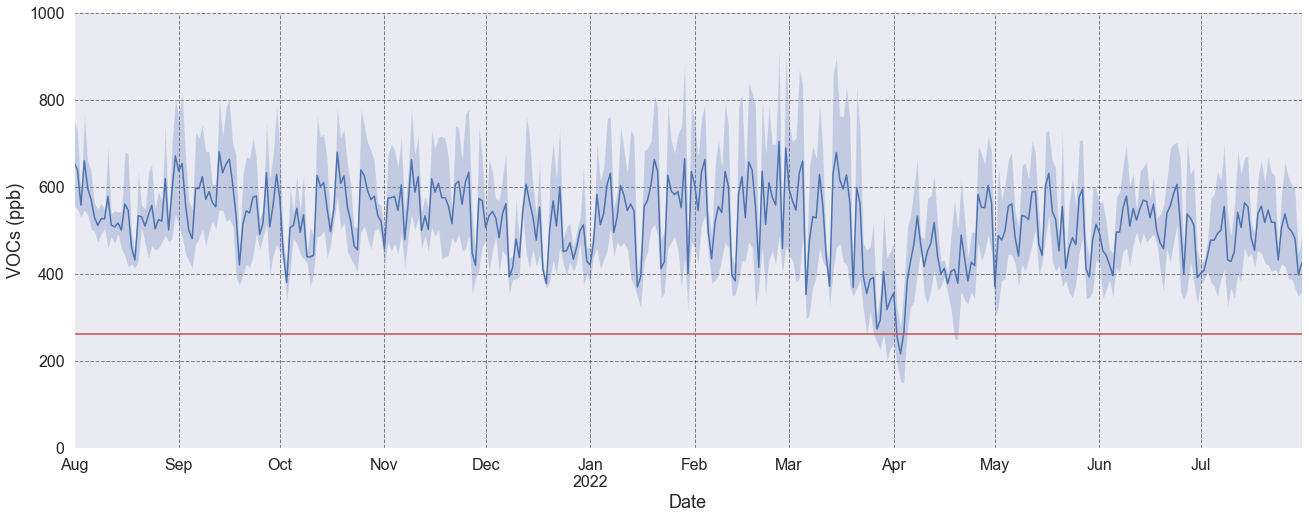

In [29]:
# Daily plot (Mean + SD) - All data - VOCs

ax = dailyVOCs['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyVOCs.index, dailyVOCs['mean'] - dailyVOCs['std'], dailyVOCs['mean'] + dailyVOCs['std'], alpha=.25)
ax.axhline(y=262, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,1000)

plt.ylabel("VOCs (ppb)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig3a - Daily mean VOCs - all data @ '+ name) 

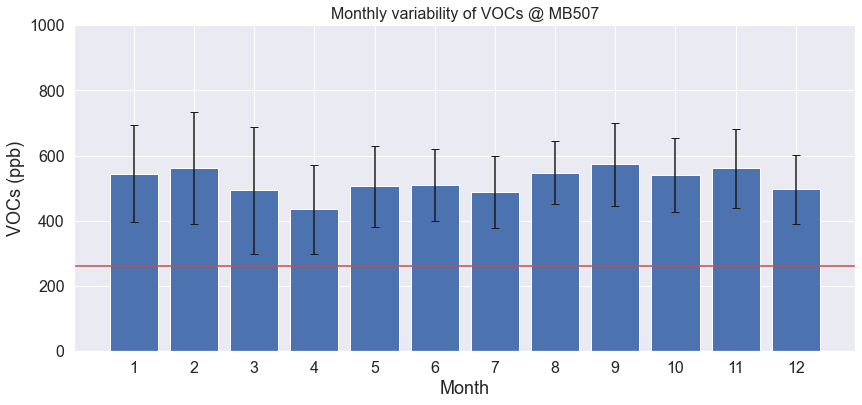

In [30]:
# Plot of box plots of daily VOCs data:

Fig3b, ax = plt.subplots()

ax.bar(x=monthlyVOCs['Month'], #x-coordinates of bars
       height=monthlyVOCs['mean'], #height of bars
       yerr=monthlyVOCs['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('VOCs (ppb)',fontsize=18)
ax.set_title('Monthly variability of VOCs @ '+ name, fontsize=16)
ax.set_ylim(0,1000)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=262, color='r', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig3b - Monthly variability of VOCs @ '+ name)

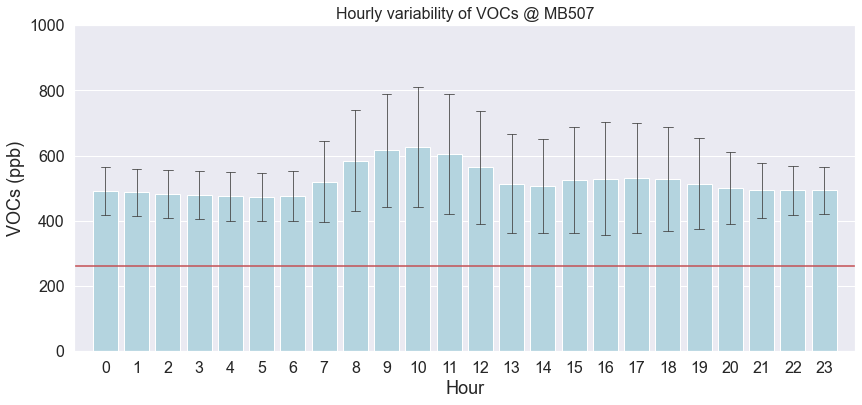

In [31]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig3c = sns.barplot(x="Hour", y="VOCs", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig3c.set_ylabel('VOCs (ppb)',fontsize=18)
Fig3c.set_title('Hourly variability of VOCs @ '+ name, fontsize=16)

Fig3c.tick_params(axis='x', labelsize=16)
Fig3c.tick_params(axis='y', labelsize=16)
Fig3c.set_ylim(0,1000)
Fig3c.set_xlim(-1,24)

Fig3c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig3c.axhline(y=262, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig3c - Hourly variability of VOCs @ '+ name)

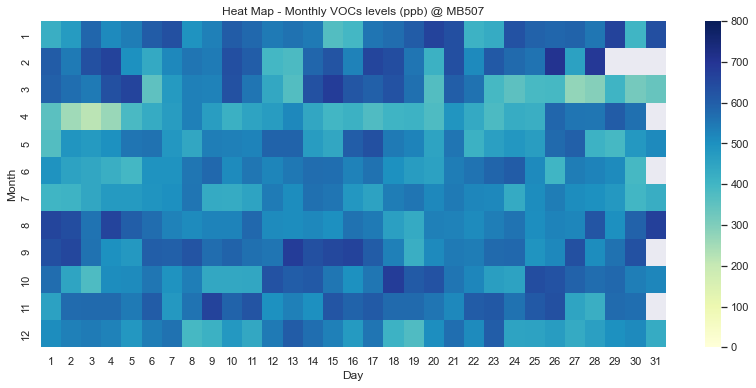

In [32]:
#Heat Map

# Transpose the dataset:

series3 = pd.pivot_table(dailyVOCs, index = 'Month', columns = 'Day', values = 'mean') 
Fig3d = sns.heatmap(series3, vmin=0, vmax=800, cmap="YlGnBu")
Fig3d.set_title('Heat Map - Monthly VOCs levels (ppb) @ '+ name)
plt.savefig('Fig3d - Heat Map - VOCs levels @ '+ name)

In [33]:
# Evaluation of PM2.5 variability

# Resample getting a several statistics parameters - Daily data
dailyPM25 = datacf['PM25'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyPM25['Year'] = dailyPM25.index.year
dailyPM25['Month'] = dailyPM25.index.month
dailyPM25['Day'] = dailyPM25.index.day


# Export to csv
output_dailyPM25  = 'data_' + name + '_dailyPM25.csv'
dailyPM25.to_csv(output_dailyPM25, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyPM25 = datacf['PM25'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyPM25['Year'] = hourlyPM25.index.year
hourlyPM25['Month'] = hourlyPM25.index.month
hourlyPM25['Day'] = hourlyPM25.index.day
hourlyPM25

# Export to csv
output_hourlyPM25  = 'data_' + name + '_hourlyPM25.csv'
hourlyPM25.to_csv(output_hourlyPM25, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyPM25 = datacf['PM25'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyPM25['Year'] = monthlyPM25.index.year
monthlyPM25['Month'] = monthlyPM25.index.month
monthlyPM25['Day'] = monthlyPM25.index.day

# Export to csv
output_monthlyPM25  = 'data_' + name + '_monthlyPM25.csv'
monthlyPM25.to_csv(output_monthlyPM25, sep=',')

monthlyPM25

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,6.874676,0.864514,8970,6.6741,6.6741,21.8186,2021,8,31
2021-09-30,7.086385,1.233422,8669,6.6741,6.6741,24.8475,2021,9,30
2021-10-31,6.912237,0.889684,8967,6.6741,6.6741,18.7897,2021,10,31
2021-11-30,6.932703,0.928645,8679,6.6741,6.6741,15.7608,2021,11,30
2021-12-31,7.333466,4.900631,8976,6.6741,6.6741,221.7260,2021,12,31
2022-01-31,7.046420,1.121317,8965,6.6741,6.6741,15.7608,2022,1,31
2022-02-28,7.553675,2.393576,8089,6.6741,6.6741,79.3677,2022,2,28
2022-03-31,7.157521,1.281428,8966,6.6741,6.6741,21.8186,2022,3,31
2022-04-30,6.746808,0.477147,8665,6.6741,6.6741,12.7319,2022,4,30


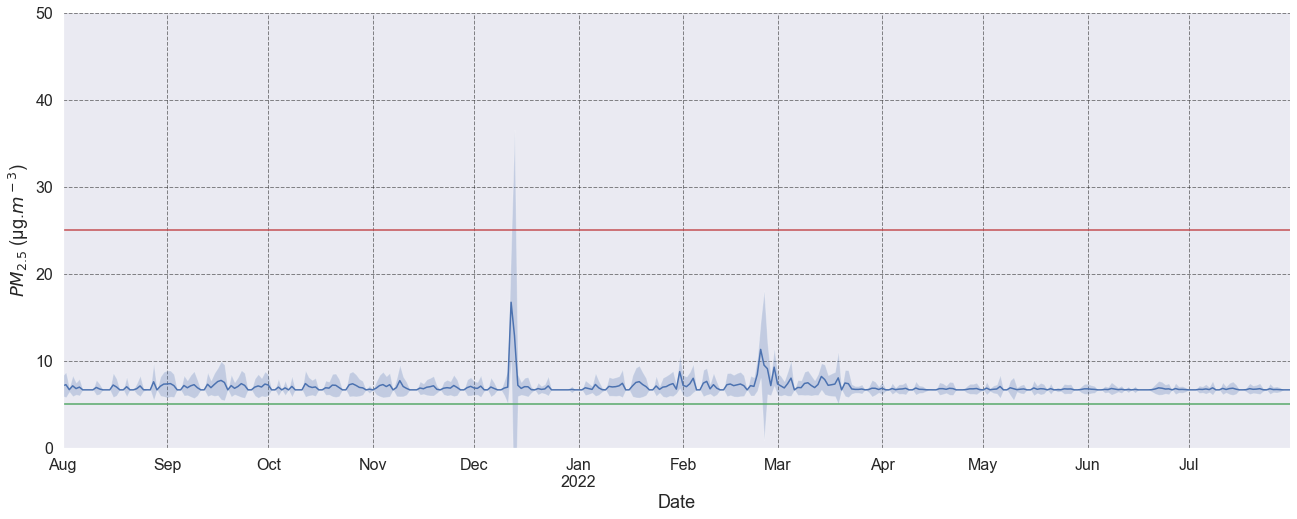

In [34]:
# Daily plot (Mean + SD) - All data - PM2.5

ax = dailyPM25['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyPM25.index, dailyPM25['mean'] - dailyPM25['std'], dailyPM25['mean'] + dailyPM25['std'], alpha=.25)
ax.axhline(y=25, color='r', linestyle='-')
ax.axhline(y=5, color='g', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,50)

plt.ylabel("$PM_{2.5}$ (μg.$m^-$$^3$)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig4a - Daily mean PM25 - all data @ '+ name) 

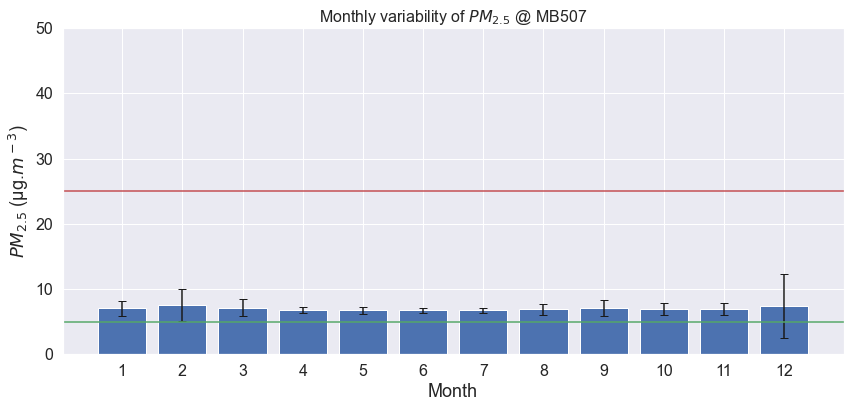

In [35]:
# Plot of box plots of daily PM2.5 data:

Fig4b, ax = plt.subplots()

ax.bar(x=monthlyPM25['Month'], #x-coordinates of bars
       height=monthlyPM25['mean'], #height of bars
       yerr=monthlyPM25['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("$PM_{2.5}$ (μg.$m^-$$^3$)",fontsize=18)
ax.set_title('Monthly variability of $PM_{2.5}$ @ '+ name, fontsize=16)
ax.set_ylim(0,50)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=25, color='r', linestyle='-')
ax.axhline(y=5, color='g', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig4b - Monthly variability of PM25 @ '+ name)

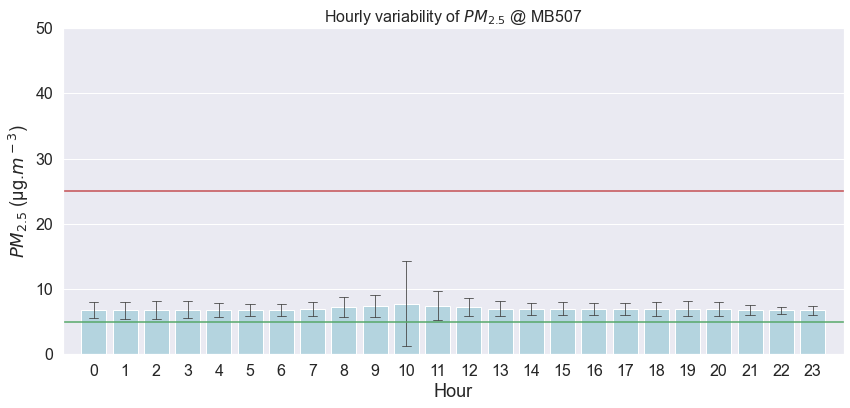

In [36]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig4c = sns.barplot(x="Hour", y="PM25", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig4c.set_ylabel('$PM_{2.5}$ (μg.$m^-$$^3$)',fontsize=18)
Fig4c.set_title('Hourly variability of $PM_{2.5}$ @ '+ name, fontsize=16)

Fig4c.tick_params(axis='x', labelsize=16)
Fig4c.tick_params(axis='y', labelsize=16)
Fig4c.set_ylim(0,50)
Fig4c.set_xlim(-1,24)

Fig4c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig4c.axhline(y=25, color='r', linestyle='-')
Fig4c.axhline(y=5, color='g', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig4c - Hourly variability of PM25 @ '+ name)

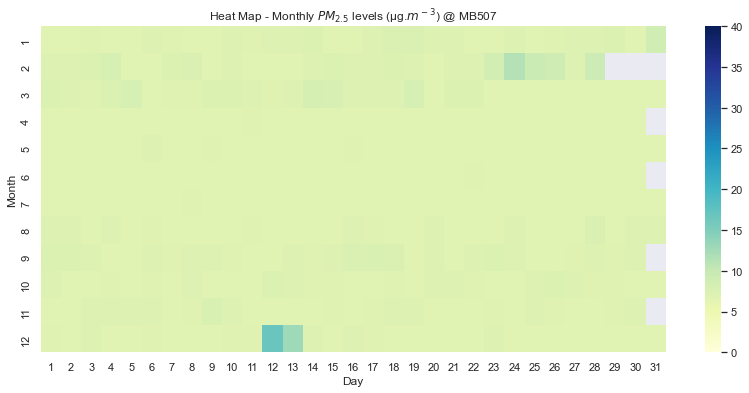

In [37]:
#Heat Map

# Transpose the dataset:

series4 = pd.pivot_table(dailyPM25, index = 'Month', columns = 'Day', values = 'mean') 
Fig4d = sns.heatmap(series4, vmin=0, vmax=40, cmap="YlGnBu")
Fig4d.set_title('Heat Map - Monthly $PM_{2.5}$ levels (μg.$m^-$$^3$) @ '+ name)
plt.savefig('Fig4d - Heat Map - PM25 levels @ '+ name)

In [38]:
# Evaluation of PM10 variability

# Resample getting a several statistics parameters - Daily data
dailyPM10 = datacf['PM10'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyPM10['Year'] = dailyPM25.index.year
dailyPM10['Month'] = dailyPM25.index.month
dailyPM10['Day'] = dailyPM25.index.day


# Export to csv
output_dailyPM10  = 'data_' + name + '_dailyPM10.csv'
dailyPM10.to_csv(output_dailyPM10, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyPM10 = datacf['PM10'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyPM10['Year'] = hourlyPM10.index.year
hourlyPM10['Month'] = hourlyPM10.index.month
hourlyPM10['Day'] = hourlyPM10.index.day
hourlyPM10

# Export to csv
output_hourlyPM10  = 'data_' + name + '_hourlyPM10.csv'
hourlyPM10.to_csv(output_hourlyPM10, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyPM10 = datacf['PM10'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyPM10['Year'] = monthlyPM10.index.year
monthlyPM10['Month'] = monthlyPM10.index.month
monthlyPM10['Day'] = monthlyPM10.index.day

# Export to csv
output_monthlyPM10  = 'data_' + name + '_monthlyPM10.csv'
monthlyPM10.to_csv(output_monthlyPM10, sep=',')

monthlyPM10

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,7.240433,0.891562,8970,7.0416,3.9559,22.4701,2021,8,31
2021-09-30,7.454854,1.267055,8669,7.0416,3.9559,25.5558,2021,9,30
2021-10-31,7.279041,0.916466,8967,7.0416,3.9559,19.3844,2021,10,31
2021-11-30,7.297231,0.960847,8679,7.0416,3.9559,16.2987,2021,11,30
2021-12-31,7.710237,5.064779,8976,7.0416,3.9559,229.2120,2021,12,31
2022-01-31,7.415051,1.152135,8965,7.0416,3.9559,16.2987,2022,1,31
2022-02-28,7.934237,2.441891,8089,7.0416,3.9559,81.0984,2022,2,28
2022-03-31,7.533054,1.307067,8966,7.0416,3.9559,22.4701,2022,3,31
2022-04-30,7.110685,0.502382,8665,7.0416,3.9559,13.2130,2022,4,30


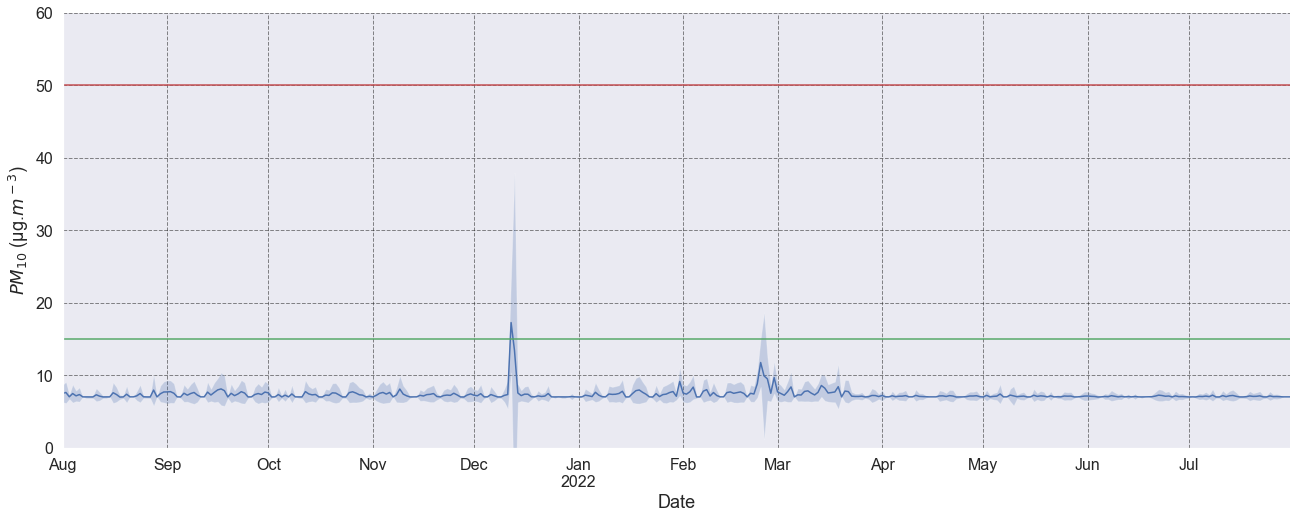

In [39]:
# Daily plot (Mean + SD) - All data - PM10

ax = dailyPM10['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyPM10.index, dailyPM10['mean'] - dailyPM10['std'], dailyPM10['mean'] + dailyPM10['std'], alpha=.25)
ax.axhline(y=50, color='r', linestyle='-')
ax.axhline(y=15, color='g', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,60)

plt.ylabel("$PM_{10}$ (μg.$m^-$$^3$)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig5a - Daily mean PM10 - all data @ '+ name) 

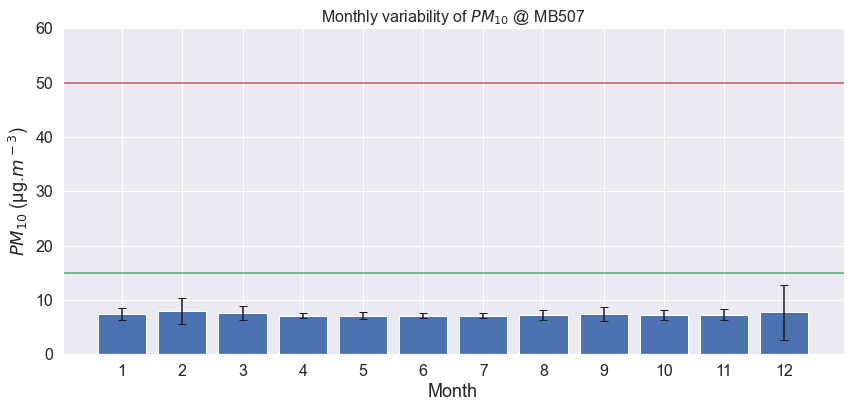

In [40]:
# Plot of box plots of daily PM2.5 data:

Fig5b, ax = plt.subplots()

ax.bar(x=monthlyPM10['Month'], #x-coordinates of bars
       height=monthlyPM10['mean'], #height of bars
       yerr=monthlyPM10['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("$PM_{10}$ (μg.$m^-$$^3$)",fontsize=18)
ax.set_title('Monthly variability of $PM_{10}$ @ '+ name, fontsize=16)
ax.set_ylim(0,60)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=50, color='r', linestyle='-')
ax.axhline(y=15, color='g', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig5b - Monthly variability of PM10 @ '+ name)

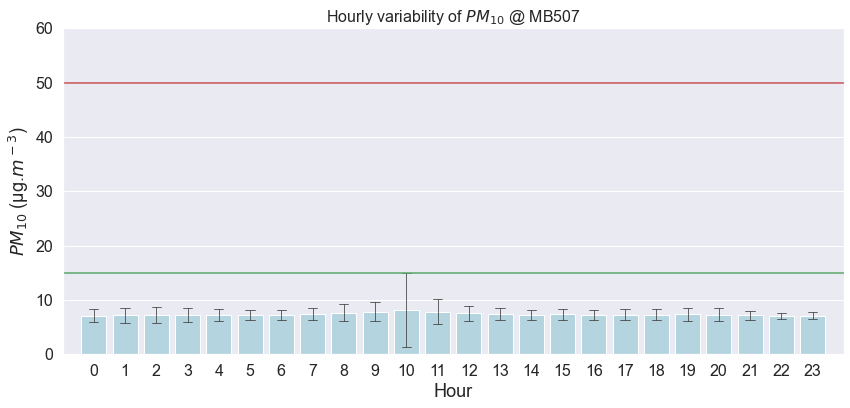

In [56]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig5c = sns.barplot(x="Hour", y="PM10", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig5c.set_ylabel('$PM_{10}$ (μg.$m^-$$^3$)',fontsize=18)
Fig5c.set_title('Hourly variability of $PM_{10}$ @ '+ name, fontsize=16)

Fig5c.tick_params(axis='x', labelsize=16)
Fig5c.tick_params(axis='y', labelsize=16)
Fig5c.set_ylim(0,60)
Fig5c.set_xlim(-1,24)

Fig5c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig5c.axhline(y=50, color='r', linestyle='-')
Fig5c.axhline(y=15, color='g', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig5c - Hourly variability of PM10 @ '+ name)

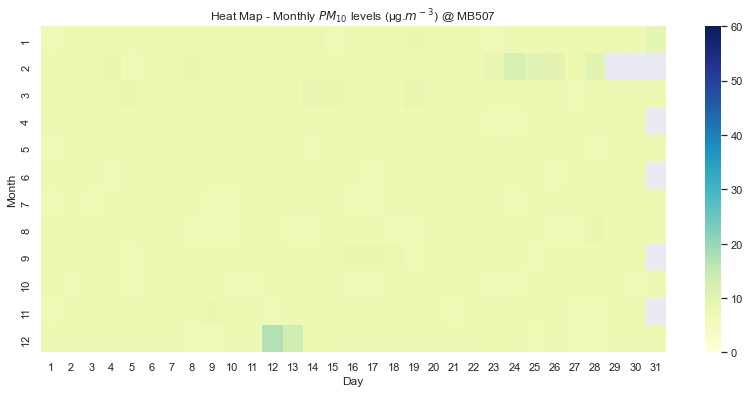

In [42]:
#Heat Map

# Transpose the dataset:

series5 = pd.pivot_table(dailyPM10, index = 'Month', columns = 'Day', values = 'mean') 
Fig5d = sns.heatmap(series5, vmin=0, vmax=60, cmap="YlGnBu")
Fig5d.set_title('Heat Map - Monthly $PM_{10}$ levels (μg.$m^-$$^3$) @ '+ name)
plt.savefig('Fig5d - Heat Map - PM10 levels @ '+ name)

In [43]:
# Evaluation of RH variability

# Resample getting a several statistics parameters - Daily data
dailyRH = datacf['RH'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyRH['Year'] = dailyRH.index.year
dailyRH['Month'] = dailyRH.index.month
dailyRH['Day'] = dailyRH.index.day


# Export to csv
output_dailyRH  = 'data_' + name + '_dailyRH.csv'
dailyRH.to_csv(output_dailyRH, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyRH = datacf['RH'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyRH['Year'] = hourlyRH.index.year
hourlyRH['Month'] = hourlyRH.index.month
hourlyRH['Day'] = hourlyRH.index.day
hourlyRH

# Export to csv
output_hourlyRH  = 'data_' + name + '_hourlyRH.csv'
hourlyRH.to_csv(output_hourlyRH, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyRH = datacf['RH'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyRH['Year'] = monthlyRH.index.year
monthlyRH['Month'] = monthlyRH.index.month
monthlyRH['Day'] = monthlyRH.index.day

# Export to csv
output_monthlyRH  = 'data_' + name + '_monthlyRH.csv'
monthlyRH.to_csv(output_monthlyRH, sep=',')

monthlyRH

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,60.401835,4.349179,8970,60.960344,44.234588,71.334968,2021,8,31
2021-09-30,55.739174,6.411182,8669,56.992272,34.303324,72.088680,2021,9,30
2021-10-31,54.684741,8.020848,8965,53.833332,34.735600,74.294396,2021,10,31
2021-11-30,41.659792,7.489188,8679,40.432776,26.921380,67.921096,2021,11,30
2021-12-31,48.870025,9.120255,8974,48.790112,28.872164,67.123048,2021,12,31
2022-01-31,35.860331,9.864400,8965,33.350100,16.513504,60.239884,2022,1,31
2022-02-28,35.903503,6.653837,8089,35.123540,18.830060,51.649784,2022,2,28
2022-03-31,40.218051,7.046322,8966,40.831800,21.645396,60.051456,2022,3,31
2022-04-30,45.355060,8.875425,8665,46.573312,20.115804,65.482616,2022,4,30


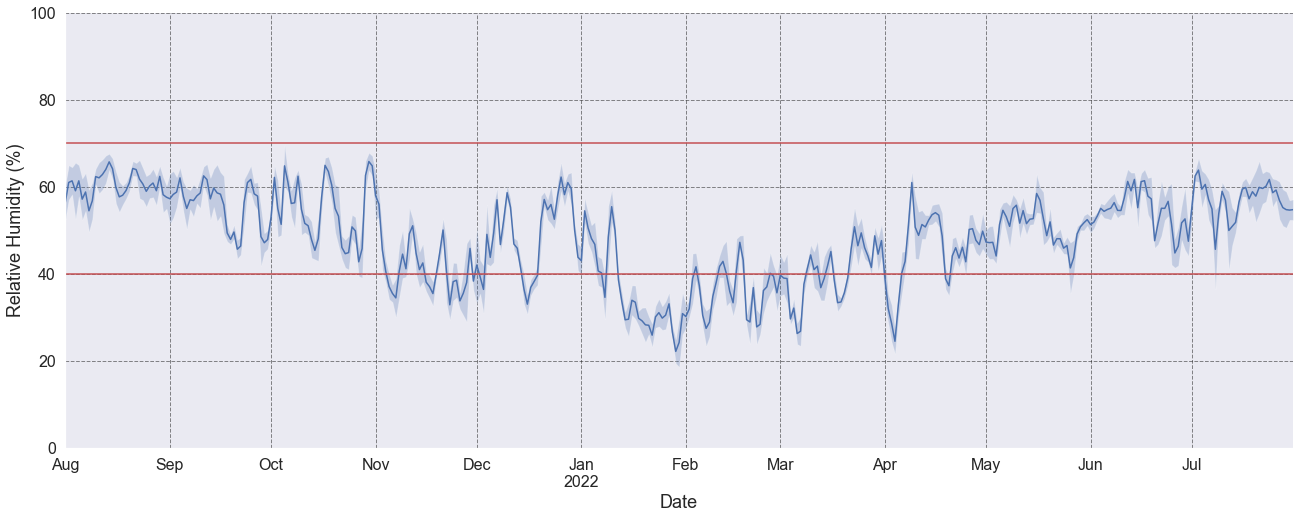

In [44]:
# Daily plot (Mean + SD) - All data - RH

ax = dailyRH['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyRH.index, dailyRH['mean'] - dailyRH['std'], dailyRH['mean'] + dailyRH['std'], alpha=.25)
ax.axhline(y=40, color='r', linestyle='-')
ax.axhline(y=70, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,100)

plt.ylabel("Relative Humidity (%)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig6a - Daily mean RH - all data @ '+ name) 

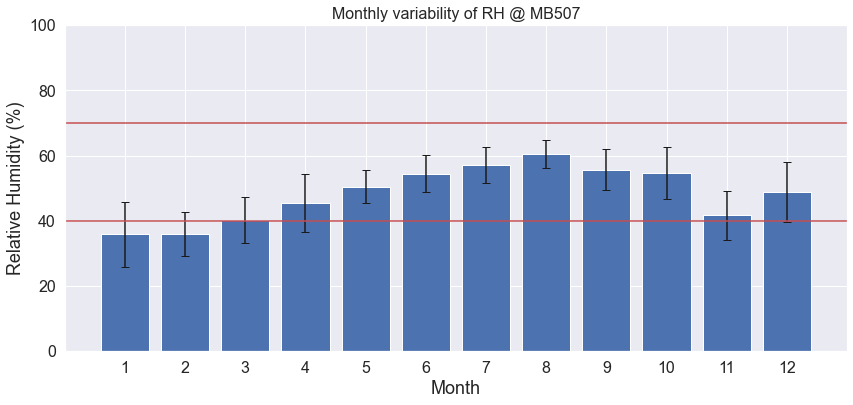

In [45]:
# Plot of box plots of daily PM2.5 data:

Fig6b, ax = plt.subplots()

ax.bar(x=monthlyRH['Month'], #x-coordinates of bars
       height=monthlyRH['mean'], #height of bars
       yerr=monthlyRH['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("Relative Humidity (%)",fontsize=18)
ax.set_title('Monthly variability of RH @ '+ name, fontsize=16)
ax.set_ylim(0,100)
ax.axhline(y=40, color='r', linestyle='-')
ax.axhline(y=70, color='r', linestyle='-')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig6b - Monthly variability of RH @ '+ name)

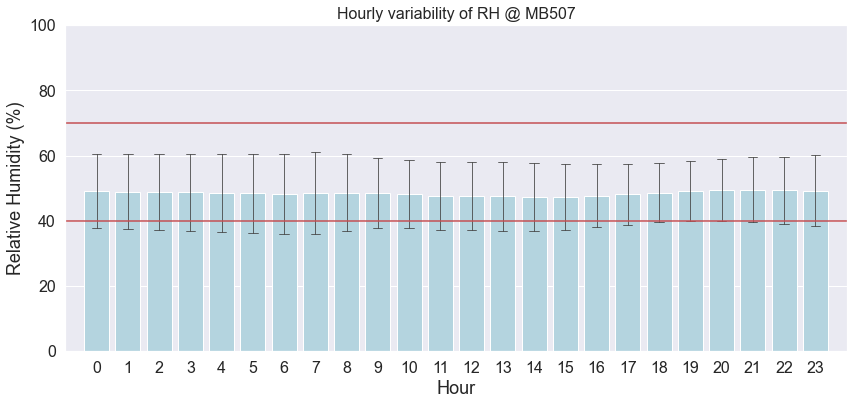

In [46]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig6c = sns.barplot(x="Hour", y="RH", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig6c.set_ylabel("Relative Humidity (%)",fontsize=18)
Fig6c.set_title('Hourly variability of RH @ '+ name, fontsize=16)

Fig6c.tick_params(axis='x', labelsize=16)
Fig6c.tick_params(axis='y', labelsize=16)
Fig6c.set_ylim(0,100)
Fig6c.set_xlim(-1,24)

Fig6c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig6c.axhline(y=40, color='r', linestyle='-')
Fig6c.axhline(y=70, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig6c - Hourly variability of RH @ '+ name)

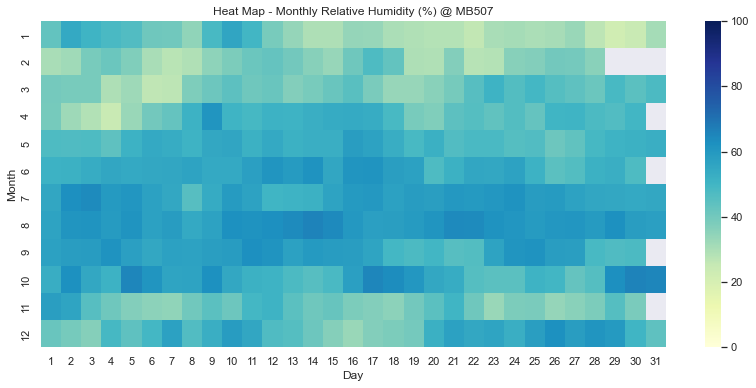

In [47]:
#Heat Map

# Transpose the dataset:

series6 = pd.pivot_table(dailyRH, index = 'Month', columns = 'Day', values = 'mean') 
Fig6d = sns.heatmap(series6, vmin=0, vmax=100, cmap="YlGnBu")
Fig6d.set_title('Heat Map - Monthly Relative Humidity (%) @ '+ name)
plt.savefig('Fig6d - Heat Map - RH levels @ '+ name)

In [48]:
datacfCorr = datacf.drop(['Year','Month','Day','Hour','Minute'], axis = 1)
datacfCorr

,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,
2021-08-01 00:02:48,426.0,57.280456,20.015342,572.0,6.6741,7.0416
2021-08-01 00:07:53,426.0,57.247204,20.007435,572.0,6.6741,7.0416
2021-08-01 00:12:48,426.0,57.180700,19.983714,567.0,6.6741,7.0416
2021-08-01 00:17:48,428.0,57.136364,20.031156,567.0,6.6741,7.0416
2021-08-01 00:22:49,430.0,57.169616,19.991621,567.0,6.6741,7.0416
...,...,...,...,...,...,...
2022-07-31 23:35:36,435.0,52.824688,19.952086,449.0,6.6741,7.0416
2022-07-31 23:40:35,434.0,53.157208,19.944179,454.0,6.6741,7.0416
2022-07-31 23:45:34,441.0,53.489728,19.959993,458.0,6.6741,7.0416


In [49]:
YearlyMeandata = datacfCorr.agg(['mean', 'std', 'count', 'median', 'min', 'max'])


# Export to csv
output_YearlyMeandata  = 'data_' + name + '_YearlyMeandata.csv'
YearlyMeandata.to_csv(output_YearlyMeandata, sep=',')

YearlyMeandata

,CO2,RH,T,VOCs,PM25,PM10
mean,452.213646,48.477155,20.004762,521.361986,6.985297,7.354099
std,57.147674,10.825922,0.921457,137.968507,1.786243,1.840912
count,105469.000000,105477.000000,105477.000000,105424.000000,105487.000000,105487.000000
median,432.000000,49.687916,20.007435,502.000000,6.674100,7.041600
min,380.000000,16.513504,16.615332,117.000000,6.674100,3.955900
max,1268.000000,74.294396,23.953028,995.000000,221.726000,229.212000


C:\Users\nunocanha\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: Futu

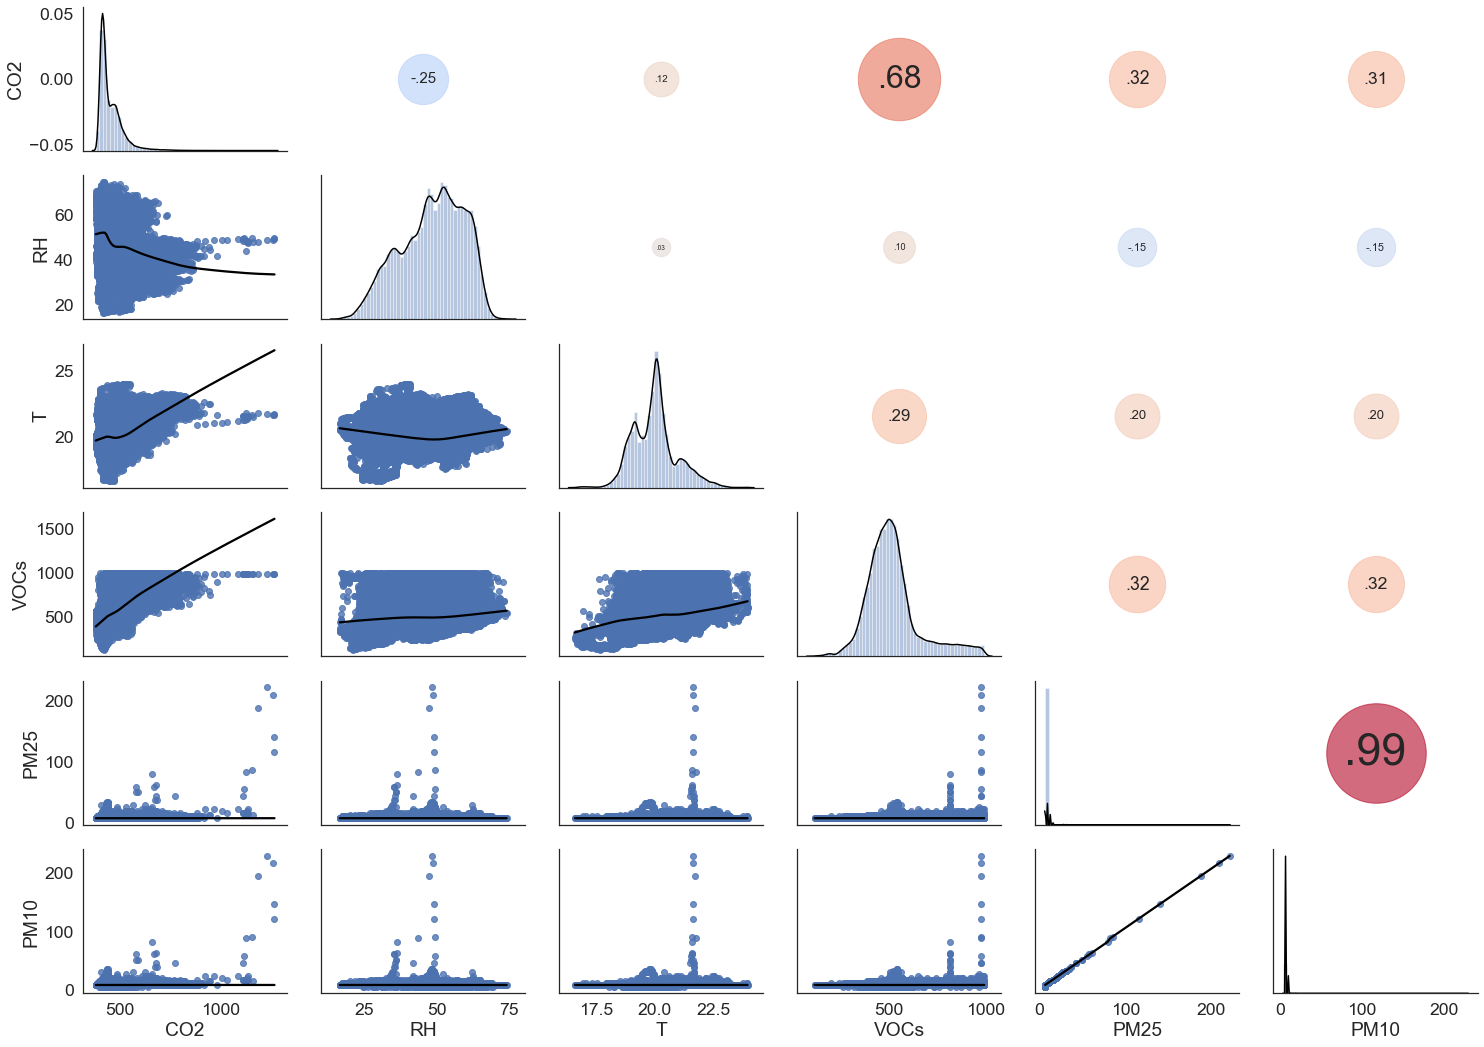

In [50]:
# Evaluation of Spearman correlations between IAQ parameters

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(datacfCorr, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

# Bigger figure
plt.rcParams['figure.figsize'] = [20, 10]

# To save the figure
plt.savefig('Fig7 - Spearman correlations between parameters @ '+ name)

C:\Users\nunocanha\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: Futu

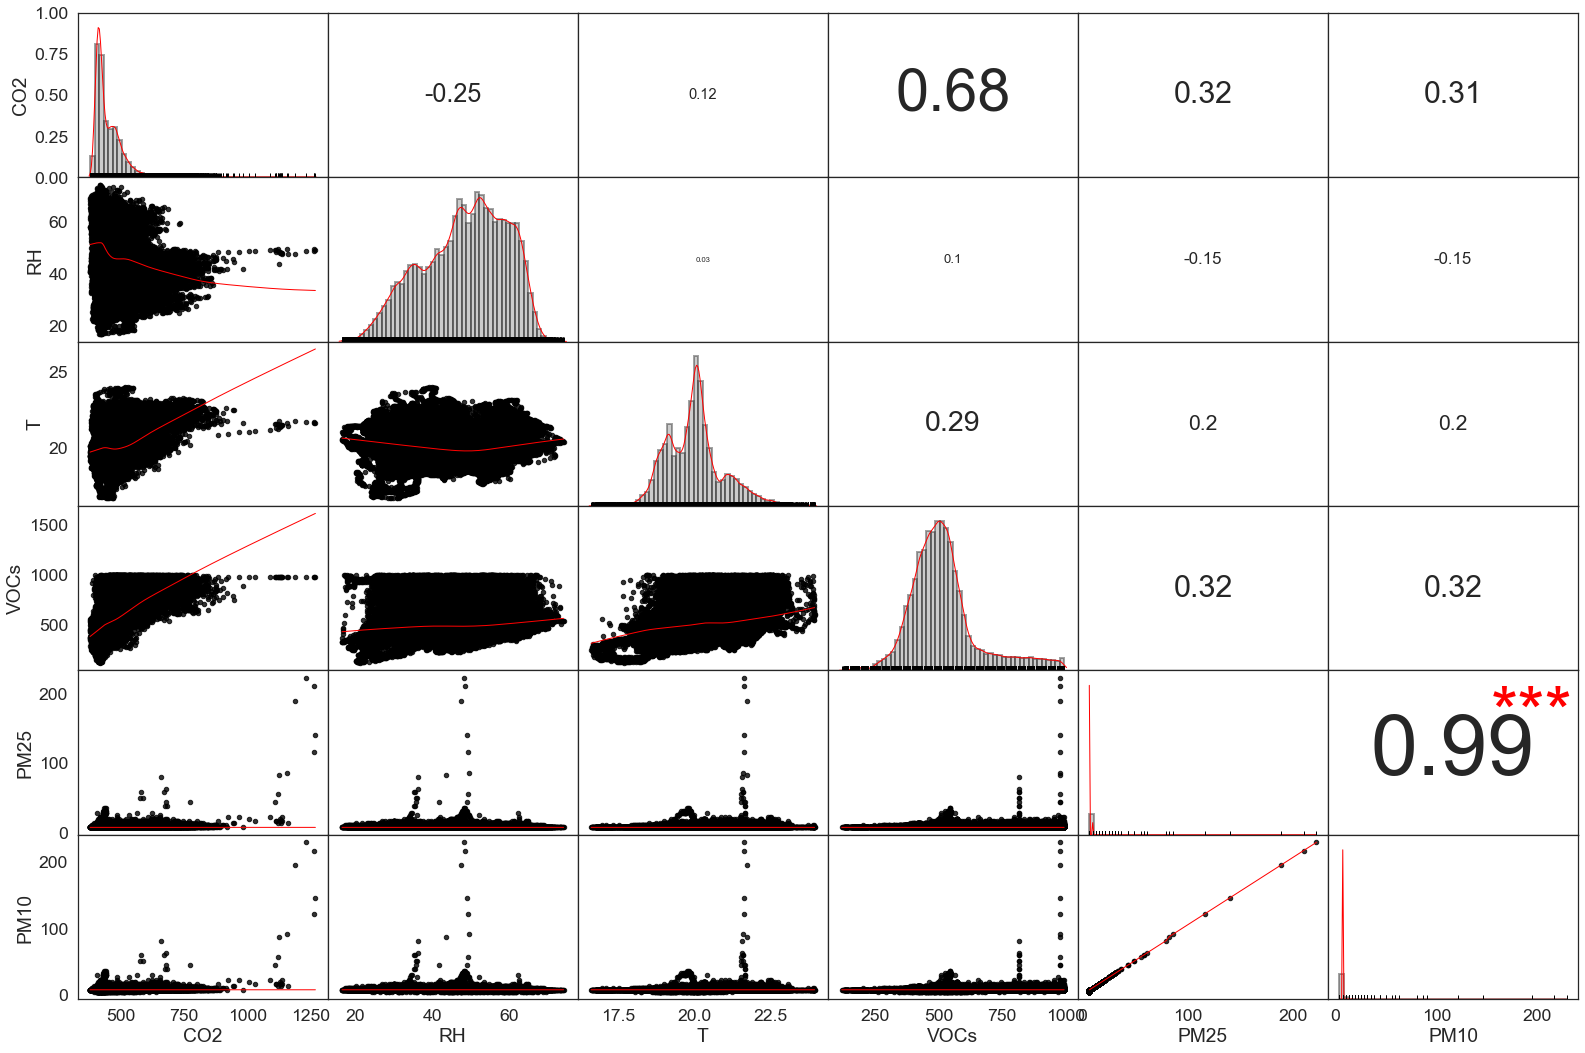

In [51]:
# Evaluation of Spearman correlations between IAQ parameters

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(datacfCorr, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
  

plt.savefig('Fig8 - Spearman correlations between parameters @ '+ name)

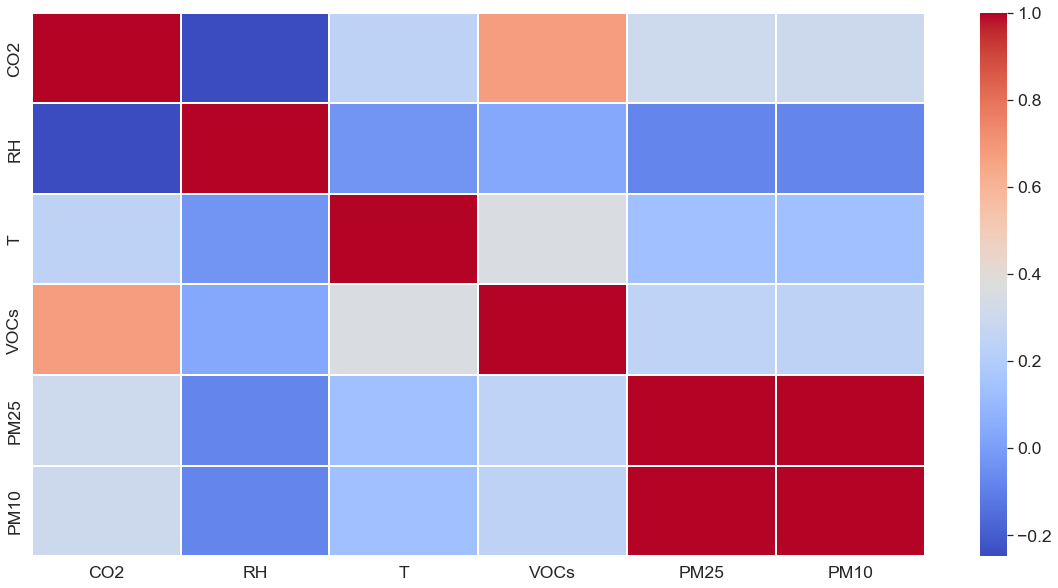

In [52]:
correlation = datacfCorr.corr()
ax = sns.heatmap(data=correlation, cmap='coolwarm', 
                 linewidths=2, cbar=True)

In [57]:
datacfCorr

,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,
2021-08-01 00:02:48,426.0,57.280456,20.015342,572.0,6.6741,7.0416
2021-08-01 00:07:53,426.0,57.247204,20.007435,572.0,6.6741,7.0416
2021-08-01 00:12:48,426.0,57.180700,19.983714,567.0,6.6741,7.0416
2021-08-01 00:17:48,428.0,57.136364,20.031156,567.0,6.6741,7.0416
2021-08-01 00:22:49,430.0,57.169616,19.991621,567.0,6.6741,7.0416
...,...,...,...,...,...,...
2022-07-31 23:35:36,435.0,52.824688,19.952086,449.0,6.6741,7.0416
2022-07-31 23:40:35,434.0,53.157208,19.944179,454.0,6.6741,7.0416
2022-07-31 23:45:34,441.0,53.489728,19.959993,458.0,6.6741,7.0416


In [58]:
datacf

,Year,Month,Day,Hour,Minute,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,,,,,,
2021-08-01 00:02:48,2021,8,1,0,2,426.0,57.280456,20.015342,572.0,6.6741,7.0416
2021-08-01 00:07:53,2021,8,1,0,7,426.0,57.247204,20.007435,572.0,6.6741,7.0416
2021-08-01 00:12:48,2021,8,1,0,12,426.0,57.180700,19.983714,567.0,6.6741,7.0416
2021-08-01 00:17:48,2021,8,1,0,17,428.0,57.136364,20.031156,567.0,6.6741,7.0416
2021-08-01 00:22:49,2021,8,1,0,22,430.0,57.169616,19.991621,567.0,6.6741,7.0416
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:35:36,2022,7,31,23,35,435.0,52.824688,19.952086,449.0,6.6741,7.0416
2022-07-31 23:40:35,2022,7,31,23,40,434.0,53.157208,19.944179,454.0,6.6741,7.0416
2022-07-31 23:45:34,2022,7,31,23,45,441.0,53.489728,19.959993,458.0,6.6741,7.0416


In [61]:
datacf('Hour').mean

TypeError: 'DataFrame' object is not callable

In [66]:
hourmean=datacf.groupby("Hour").agg("mean")
hourmean

,Year,Month,Day,Minute,CO2,RH,T,VOCs,PM25,PM10
Hour,,,,,,,,,,
0,2021.578189,6.534294,15.696159,29.639689,445.356653,49.264175,19.822241,492.309785,6.766200,7.130488
1,2021.580154,6.523388,15.730018,29.579927,446.946400,48.963472,19.780373,486.909628,6.787581,7.150903
2,2021.580704,6.525993,15.730079,29.543473,447.496254,48.844372,19.739776,483.021566,6.830186,7.192207
3,2021.580551,6.542193,15.741426,29.590478,448.327158,48.739723,19.704098,479.517389,6.840170,7.199645
4,2021.581200,6.526614,15.728199,29.460929,447.855946,48.485572,19.670162,475.739298,6.818856,7.180684
5,2021.580410,6.526879,15.739408,29.505923,447.497039,48.394842,19.636035,473.411617,6.796222,7.162498
6,2021.579832,6.526005,15.712469,29.469453,447.608449,48.292800,19.610401,476.321599,6.828193,7.192977
7,2021.580851,6.521037,15.744599,29.619741,455.209329,48.579753,19.652627,519.867607,6.970308,7.340556
8,2021.579991,6.523929,15.719462,29.593892,479.710346,48.600802,19.862864,584.827940,7.303625,7.680118


In [68]:
hourstd=datacf.groupby("Hour").agg("std")
hourstd

,Year,Month,Day,Minute,CO2,RH,T,VOCs,PM25,PM10
Hour,,,,,,,,,,
0,0.493905,3.449825,8.796154,17.286757,36.185789,11.345407,0.861988,73.115422,1.186430,1.215339
1,0.493589,3.448613,8.782144,17.294873,37.673269,11.390980,0.850842,73.108828,1.299787,1.332023
2,0.493500,3.450844,8.802739,17.342498,38.353521,11.608115,0.850176,73.685130,1.404771,1.441054
3,0.493525,3.436831,8.792239,17.380691,39.322960,11.764390,0.846672,74.081384,1.309075,1.347805
4,0.493418,3.449967,8.807304,17.331525,38.843144,11.927768,0.860743,74.764504,1.060312,1.093212
5,0.493548,3.454958,8.795205,17.316504,38.538939,12.097057,0.860683,74.447443,0.902731,0.926004
6,0.493642,3.452796,8.803911,17.328930,39.079914,12.290232,0.866449,76.367405,0.888286,0.915399
7,0.493476,3.454346,8.796173,17.338401,42.430214,12.504073,0.858442,124.469025,1.061530,1.086212
8,0.493616,3.453639,8.792179,17.312322,57.786084,11.789052,0.886758,155.983256,1.510094,1.542399


In [69]:
# Export to csv
output_hourmean  = 'data_' + name + '_hourlymean.csv'
hourmean.to_csv(output_hourmean, sep=',')

output_hourstd  = 'data_' + name + '_hourlystd.csv'
hourstd.to_csv(output_hourstd, sep=',')